In [18]:
import shap
import random
from sklearn.inspection import permutation_importance
import joblib
from pathlib import Path
import matplotlib.pyplot as plt


In [12]:
splits = joblib.load("../data/preprocessed_splits.pkl")

#Long Session
X_test_long_session = splits["Long Session"]["X_test"]
y_test_long_session = splits["Long Session"]["y_test"]

X_test_cost_regression = splits["Charging Cost (USD)"]["X_test"]
y_test_cost_regression = splits["Charging Cost (USD)"]["y_test"]

X_test_time_regression = splits["Charging Time Difference (minutes)"]["X_test"]
y_test_time_regression = splits["Charging Time Difference (minutes)"]["y_test"]

In [13]:
SampleOne_long_session = X_test_long_session.iloc[12:13]
SampleOne_cost_regression = X_test_cost_regression.iloc[12:13]
SampleOne_time_regression = X_test_time_regression.iloc[12:13]

In [26]:
display(SampleOne_time_regression, SampleOne_long_session, SampleOne_cost_regression)

,Battery Capacity (kWh),Energy Consumed (kWh),Charging Rate (kW),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),...,Vehicle Model_BMW i3,Vehicle Model_Chevy Bolt,Vehicle Model_Hyundai Kona,Vehicle Model_Nissan Leaf,Vehicle Model_Tesla Model 3,Charging Station Location_Chicago,Charging Station Location_Houston,Charging Station Location_Los Angeles,Charging Station Location_New York,Charging Station Location_San Francisco
7436,35.715572,70.360345,25.682766,3,0,16.571328,100.0,240.174492,23.386437,6.0,...,False,False,False,True,False,False,True,False,False,False


,Battery Capacity (kWh),Energy Consumed (kWh),Charging Rate (kW),Charging Time Difference (minutes),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),...,Vehicle Model_BMW i3,Vehicle Model_Chevy Bolt,Vehicle Model_Hyundai Kona,Vehicle Model_Nissan Leaf,Vehicle Model_Tesla Model 3,Charging Station Location_Chicago,Charging Station Location_Houston,Charging Station Location_Los Angeles,Charging Station Location_New York,Charging Station Location_San Francisco
7436,35.715572,70.360345,25.682766,165,3,0,16.571328,100.0,240.174492,23.386437,...,False,False,False,True,False,False,True,False,False,False


,Battery Capacity (kWh),Energy Consumed (kWh),Charging Rate (kW),Charging Time Difference (minutes),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),...,Vehicle Model_BMW i3,Vehicle Model_Chevy Bolt,Vehicle Model_Hyundai Kona,Vehicle Model_Nissan Leaf,Vehicle Model_Tesla Model 3,Charging Station Location_Chicago,Charging Station Location_Houston,Charging Station Location_Los Angeles,Charging Station Location_New York,Charging Station Location_San Francisco
7436,35.715572,70.360345,25.682766,165,3,0,16.571328,100.0,240.174492,23.386437,...,False,False,False,True,False,False,True,False,False,False


In [11]:
long_session = joblib.load(r"..\saved_models\long_session.pkl")
cost_regression = joblib.load(r"..\saved_models\cost_regression.pkl")
time_regression = joblib.load(r"..\saved_models\time_regression.pkl")


## Classification

In [ ]:
prediction = long_session.predict(SampleOne_long_session)[0]
props = long_session.predict_proba(SampleOne_long_session)

prediction_result = "Normal" if prediction == 1 else "Long Session"
prediction_result, props

('Normal', array([[0.00327986, 0.99672014]], dtype=float32))

## Shap

In [28]:
# Initialize the SHAP explainer
explainer_ls = shap.TreeExplainer(long_session)
explainer_tr = shap.TreeExplainer(time_regression)
explainer_cr = shap.TreeExplainer(cost_regression)

# Generate SHAP values
shap_values_sampleOne_ls = explainer_ls.shap_values(SampleOne_long_session)
shap_values_sampleOne_tr = explainer_tr.shap_values(SampleOne_time_regression)
shap_values_sampleOne_cr = explainer_cr.shap_values(SampleOne_cost_regression)

display(shap_values_sampleOne_ls, shap_values_sampleOne_ls.shape)
display(shap_values_sampleOne_tr, shap_values_sampleOne_tr.shape)
display(shap_values_sampleOne_cr, shap_values_sampleOne_cr.shape)

array([[ 3.9090207e+00, -3.3371064e-01,  4.3556300e-01, -6.5475154e-01,
         8.5390165e-02, -8.6606696e-02,  1.5175092e-01, -5.4708626e-02,
         1.5085898e-01,  1.2685939e+00,  3.1257603e-01,  1.0264870e-01,
         2.2891972e-02,  5.9260435e-02, -2.8795958e-01, -4.4423521e-02,
         1.3777092e-02, -1.5878525e-02,  3.9243456e-02,  1.7822102e-02,
         1.5047712e-02, -2.1554543e-02, -1.1501266e-03, -1.3697016e-02,
         2.4943296e-02]], dtype=float32)

(1, 25)

array([[17.8277    , -0.72188723,  8.535389  , -2.458021  ,  2.5401816 ,
        17.962072  ,  1.8878744 , 11.801905  ,  4.6705747 , -6.0347257 ,
         1.4143311 ,  0.87221277,  2.6734917 ,  7.1989875 , -9.603356  ,
        -0.7212178 , -1.2448851 ,  1.1256    , -3.5207818 ,  1.5236481 ,
         1.4199996 ,  0.01849587, -0.7285101 , -0.7119426 ,  0.13042426]],
      dtype=float32)

(1, 25)

array([[ 4.0740315e-03,  9.7635231e+00,  3.8569008e-03, -2.8082039e-03,
         1.3349459e-03, -3.4088562e-03,  9.9872258e-03,  2.8774526e-03,
         5.4702931e-03, -9.3763806e-03, -6.7233820e-03,  7.6844611e+00,
        -4.7248494e-04, -4.7989511e-03, -4.8339882e-04, -8.3867525e-04,
         1.4453281e-03, -2.2312097e-04, -2.1597163e-03, -8.3896000e-04,
        -2.1218114e-04, -3.0680366e-03, -4.7347511e-04, -1.1528762e-05,
         1.5297942e-03]], dtype=float32)

(1, 25)

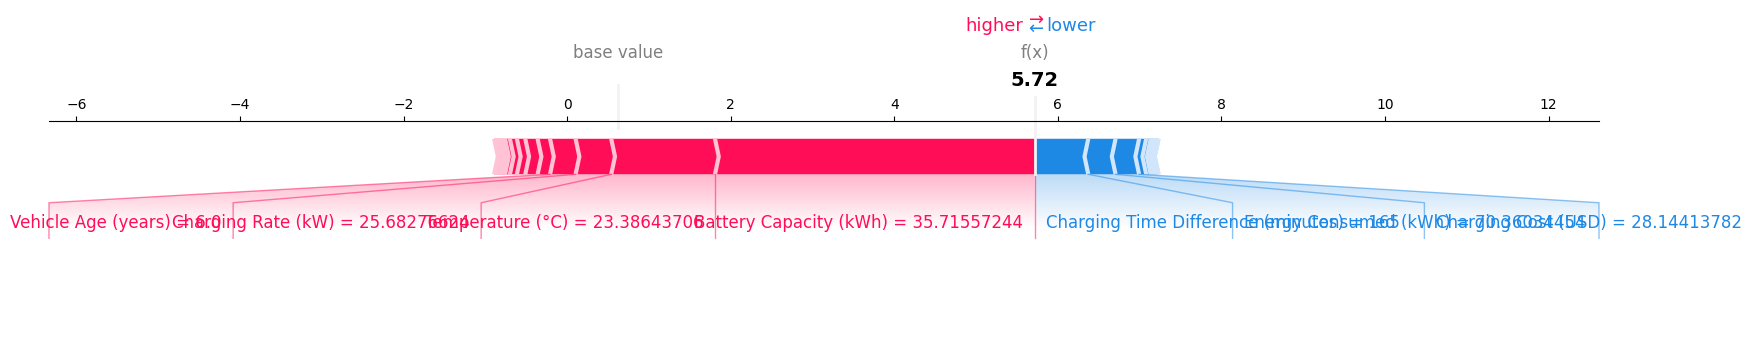

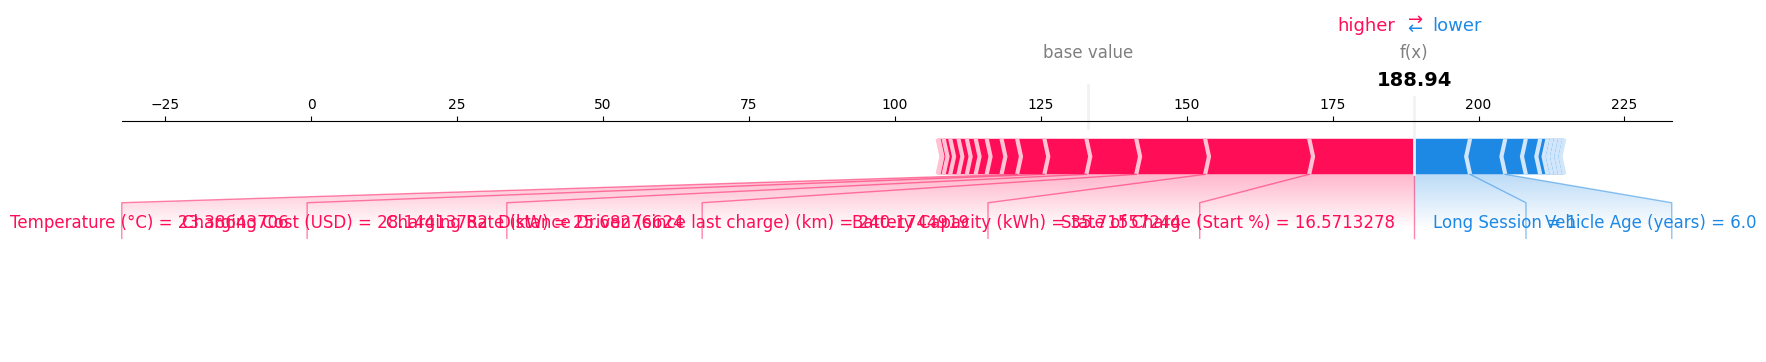

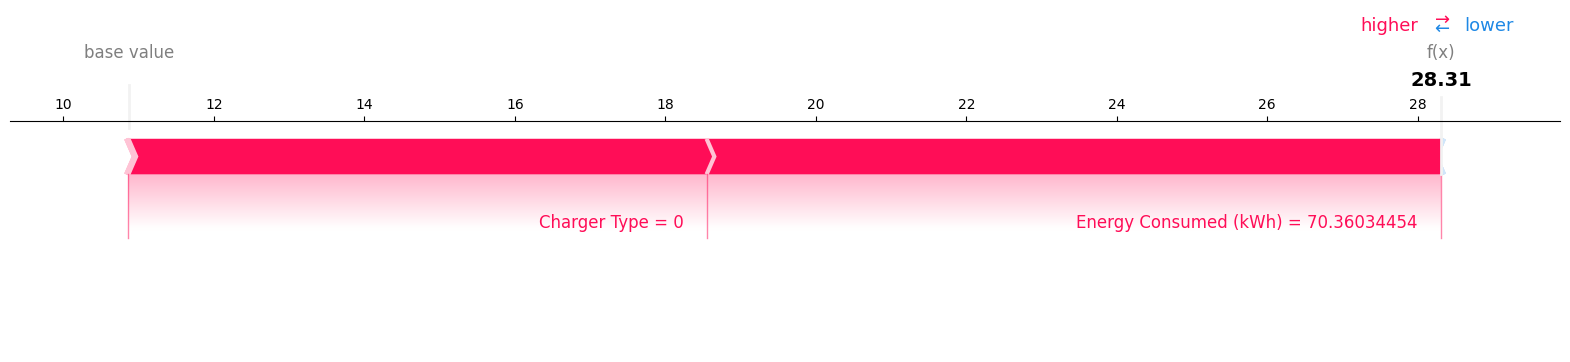

In [29]:
#Long Session
shap.plots.force(
    base_value=explainer_ls.expected_value,      # just the scalar
    shap_values=shap_values_sampleOne_ls,        # already 1D
    features=SampleOne_long_session.values[0],
    feature_names=X_test_long_session.columns,
    matplotlib=True
)
#Time Regression
shap.plots.force(
    base_value=explainer_tr.expected_value,      # just the scalar
    shap_values=shap_values_sampleOne_tr,        # already 1D
    features=SampleOne_time_regression.values[0],
    feature_names=X_test_time_regression.columns,
    matplotlib=True
)

#Cost Regression
shap.plots.force(
    base_value=explainer_cr.expected_value,      # just the scalar
    shap_values=shap_values_sampleOne_cr,        # already 1D
    features=SampleOne_cost_regression.values[0],
    feature_names=X_test_cost_regression.columns,
    matplotlib=True
)



In [30]:
joblib.dump(explainer_ls, '../explainers/Long_Session_Explainer.pkl')
joblib.dump(explainer_cr, '../explainers/Cost_Regression_Explainer.pkl')
joblib.dump(explainer_tr, '../explainers/Time_Regression_Explainer.pkl')

['../explainers/Time_Regression_Explainer.pkl']